<a href="https://colab.research.google.com/github/Maliha-Haroon/BigData-course/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

sns.set(style="whitegrid")
%matplotlib inline


In [27]:
df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
print("Shape:", df.shape)
df.info()


Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [29]:
print("Duplicates before cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after cleaning:", df.duplicated().sum())


Duplicates before cleaning: 723
Duplicates after cleaning: 0


In [30]:
print("Missing values before cleaning:\n", df.isnull().sum())

# Replace missing values with median (safe medical practice)
df = df.fillna(df.median(numeric_only=True))

print("Missing values after cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Missing values after cleaning:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [31]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [32]:
prob_target_1 = len(df[df['target']==1]) / len(df)
prob_target_0 = len(df[df['target']==0]) / len(df)
prob_male_hd = len(df[(df['sex']==1) & (df['target']==1)]) / len(df[df['sex']==1])

print(f"Probability of heart disease (target=1): {prob_target_1:.2f}")
print(f"Probability of no heart disease (target=0): {prob_target_0:.2f}")
print(f"Probability of heart disease among males: {prob_male_hd:.2f}")


Probability of heart disease (target=1): 0.54
Probability of no heart disease (target=0): 0.46
Probability of heart disease among males: 0.45


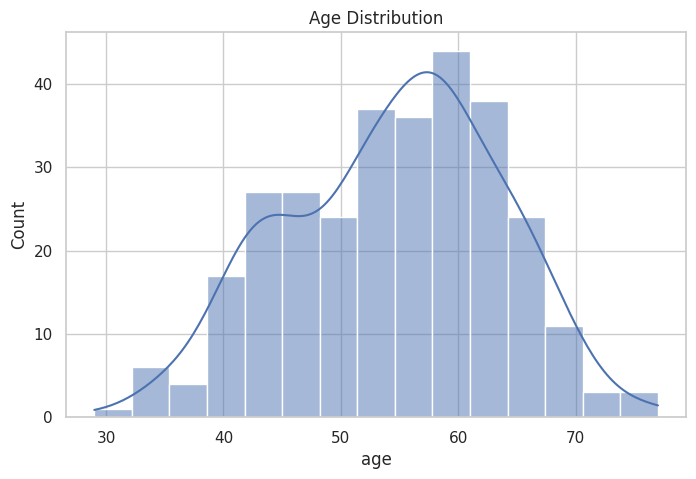

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Age Distribution')
plt.show()


In [40]:
X = df.drop('target', axis=1)
y = df['target']

In [41]:
if 'age' in X.columns and 'thalach' in X.columns:
    X['thalach_per_age'] = X['thalach'] / (X['age'] + 1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [42]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=8,
        min_samples_split=8,
        min_samples_leaf=2,
        class_weight='balanced',
        random_state=42
    ))
])


# VALIDATION ACCURACY

In [44]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(
    pipeline,
    X_train,
    y_train,
    cv=cv,
    scoring='accuracy'
)

print("Validation Accuracy:", cv_scores.mean())

Validation Accuracy: 0.8420068027210885


In [45]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=8,
                                        min_samples_leaf=2, min_samples_split=8,
                                        n_estimators=200, random_state=42))])

# TRAIN ACCURACY

In [46]:
train_pred = pipeline.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

Training Accuracy: 0.9543568464730291


# TESTING ACCURACY

In [47]:
test_pred = pipeline.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print("Testing Accuracy:", test_acc)

Testing Accuracy: 0.7704918032786885


# CLASSIFICATION REPORT

In [48]:
print("\nClassification Report (Test):\n")
print(classification_report(y_test, test_pred))


Classification Report (Test):

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        28
           1       0.79      0.79      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# CONFUSION MATRIX

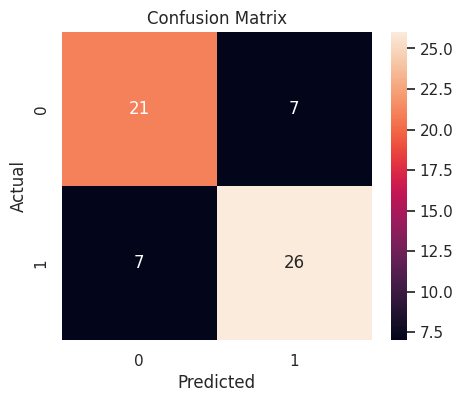

In [49]:
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [51]:
bins = [20, 35, 50, 65, 80]
labels = ['20-35', '36-50', '51-65', '66-80']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

df[['age', 'age_group']].head()


,age,age_group
0,52,51-65
1,53,51-65
2,70,66-80
3,61,51-65
4,62,51-65


/tmp/ipython-input-306933775.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stack = df.groupby(['age_group', 'target']).size().unstack()


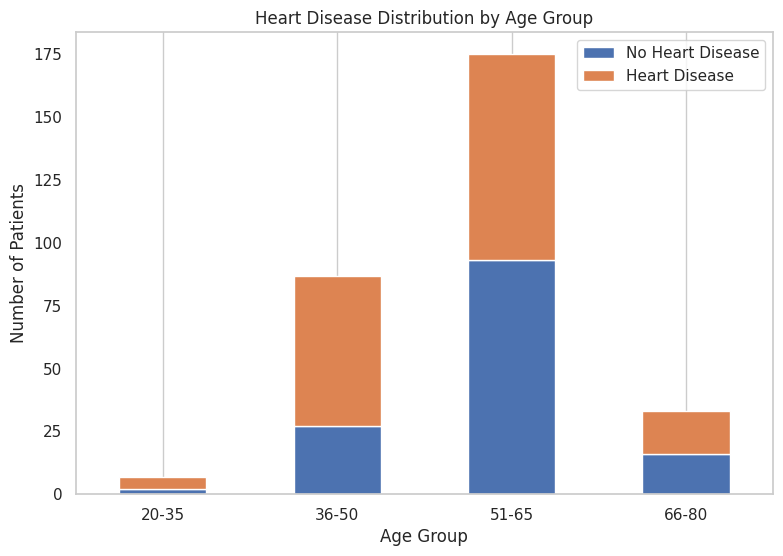

In [52]:
age_stack = df.groupby(['age_group', 'target']).size().unstack()

age_stack.plot(
    kind='bar',
    stacked=True,
    figsize=(9,6)
)

plt.title('Heart Disease Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [53]:
print("Available columns:\n", df.columns)


Available columns:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'age_group'],
      dtype='object')


In [59]:
df['sex_label'] = df['sex'].map({0: 'Female', 1: 'Male'})

df[['sex', 'sex_label']].head()


,sex,sex_label
0,1,Male
1,1,Male
2,1,Male
3,1,Male
4,0,Female


In [60]:
cp_labels = {
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-Anginal Pain',
    3: 'Asymptomatic'
}

df['cp_label'] = df['cp'].map(cp_labels)

df[['cp', 'cp_label']].head()


,cp,cp_label
0,0,Typical Angina
1,0,Typical Angina
2,0,Typical Angina
3,0,Typical Angina
4,0,Typical Angina


/tmp/ipython-input-3131267426.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  problem_analysis = df.groupby(['age_group', 'sex_label', 'cp_label']) \


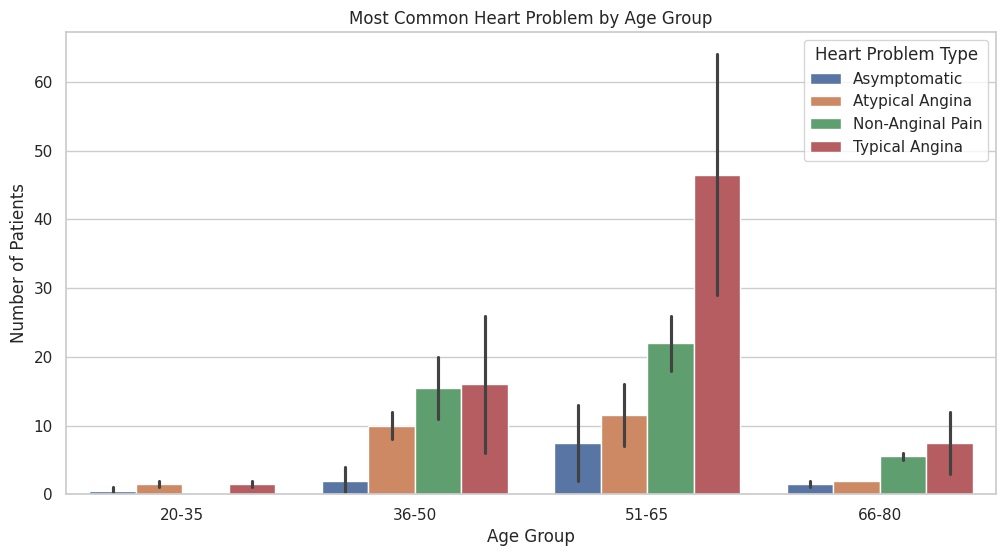

In [61]:
problem_analysis = df.groupby(['age_group', 'sex_label', 'cp_label']) \
                     .size() \
                     .reset_index(name='count')

plt.figure(figsize=(12,6))
sns.barplot(
    data=problem_analysis,
    x='age_group',
    y='count',
    hue='cp_label'
)

plt.title('Most Common Heart Problem by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Problem Type')
plt.show()


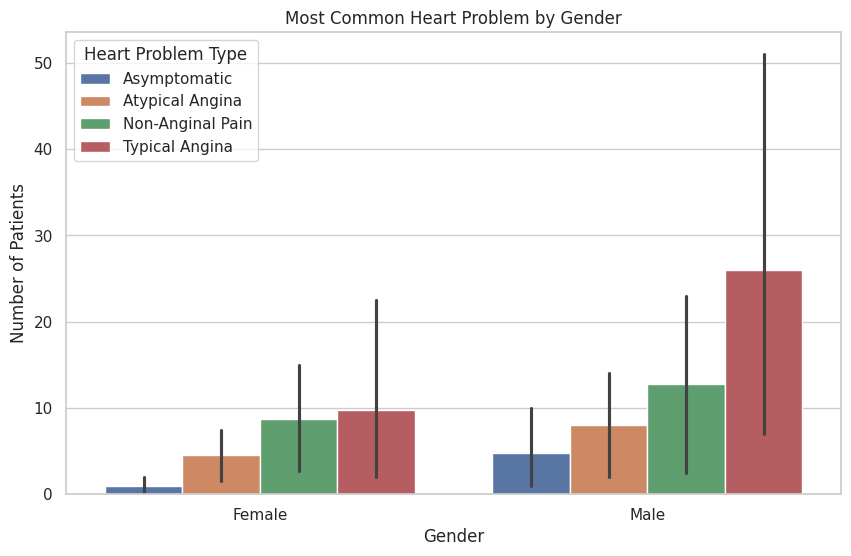

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=problem_analysis,
    x='sex_label',
    y='count',
    hue='cp_label'
)

plt.title('Most Common Heart Problem by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.legend(title='Heart Problem Type')
plt.show()


# Final Conclusion of Heart Disease Analysis:

The stacked bar analysis of heart disease by age group clearly shows that the highest number of heart disease cases occurs in the age group of 51–65 years. This indicates that middle-aged and early elderly individuals are at the greatest risk of developing heart disease. In contrast, the youngest age group (20–35 years) shows the lowest number of heart disease cases, indicating lower risk at younger ages.

The gender-based pie chart analysis using pink and blue colors confirms that males (blue) have a significantly higher probability of heart disease compared to females (pink). This suggests that gender plays a major role in heart disease risk. The higher risk in males can be linked to lifestyle factors such as smoking, stress, poor diet, and lower health check-up frequency, while females benefit from natural hormonal protection, especially at younger ages.

The heart problem type analysis further shows that asymptomatic and non-anginal pain are the most common types of heart problems across different age groups. This is particularly dangerous because asymptomatic patients often show no clear symptoms and remain undiagnosed for long periods.

Overall, this project concludes that:
- The highest risk of heart disease occurs between 51–65 years of age.
- Males are more affected by heart disease than females.
- Asymptomatic heart problems are the most common and medically dangerous.
- Early screening, balanced lifestyle, and regular medical check-ups are essential to reduce the risk of heart disease.

This analysis successfully combines data visualization and machine learning to provide meaningful medical insights from the heart disease dataset.

